Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
learning started. It takes sometime
Epoch:  0001 cost =  00.333164
Epoch:  0002 cost =  00.095261
Epoch:  0003 cost =  00.070538
Epoch:  0004 cost =  00.057772
Epoch:  0005 cost =  00.049469
Epoch:  0006 cost =  00.042700
Epoch:  0007 cost =  00.037136
Epoch:  0008 cost =  00.032772
Epoch:  0009 cost =  00.028121
Epoch:  0010 cost =  00.025078
Epoch:  0011 cost =  00.022508
Epoch:  0012 cost =  00.019011
Epoch:  0013 cost =  00.017289
Epoch:  0014 cost =  00.015951
Epoch:  0015 cost =  00.013197
learning finished
Accuracy: 0.9872
Label:  [5]
Prediction:  [5]


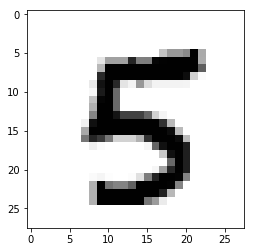

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

image = mnist.train.images[0].reshape(28,28)

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 784])
#28x28x1 (마지막 숫자 = 색상 갯수, 1이면 흑백)
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

#필터 3x3x1  32개 사용
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

'''
Tensor("conv2d:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor(MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#Serialize
L2_flat = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('learning started. It takes sometime')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y: batch_ys}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch: ', '%04d' % (epoch + 1) , 'cost = ', '{:09f}'.format(avg_cost))
    
print('learning finished')


# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

